<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Customer Segmentation - Artificial Neural Network</p>

<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Import Library</p>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
import warnings
warnings.filterwarnings('ignore')

<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Import Dataset</p>

In [47]:
df = pd.read_csv('weatherAUS.csv')

In [48]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">About The Dataset</p>

**About the dataset:**
The dataset contains about 10 years of daily weather observations from different locations accross Australia. Observations were recorded from numerous weather stations.
<br /> <br />
In this kernel, this dataset will be used to predict whether it will rain in the next day or not. There are 23 attributes including the target variable 'RainTomorrow'.

In [49]:
# Shape of the dataset
df.shape

(145460, 23)

The dataset have 145460 rows and 23 columns

In [50]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [51]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

**NOTE:**
<br />
* There are quite a lot of missing values in the dataset
* Dataset includes numeric and categorical values

<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Exploratory Data Analysis</p>

**Steps involved in this section:**
<br />
* Count plot of target column
* Correlation among attributes with numeric values
* Parse Date variable into datetime

<Axes: xlabel='RainTomorrow', ylabel='count'>

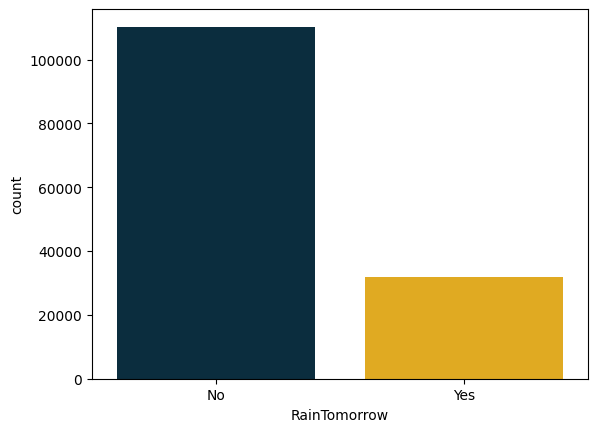

In [52]:
# Evaluate the target variable to find out the distribution
# We will require seaborn
import seaborn as sns

colors = ['#023047', '#ffb703']
sns.countplot(x = df['RainTomorrow'], palette = colors)

<Axes: >

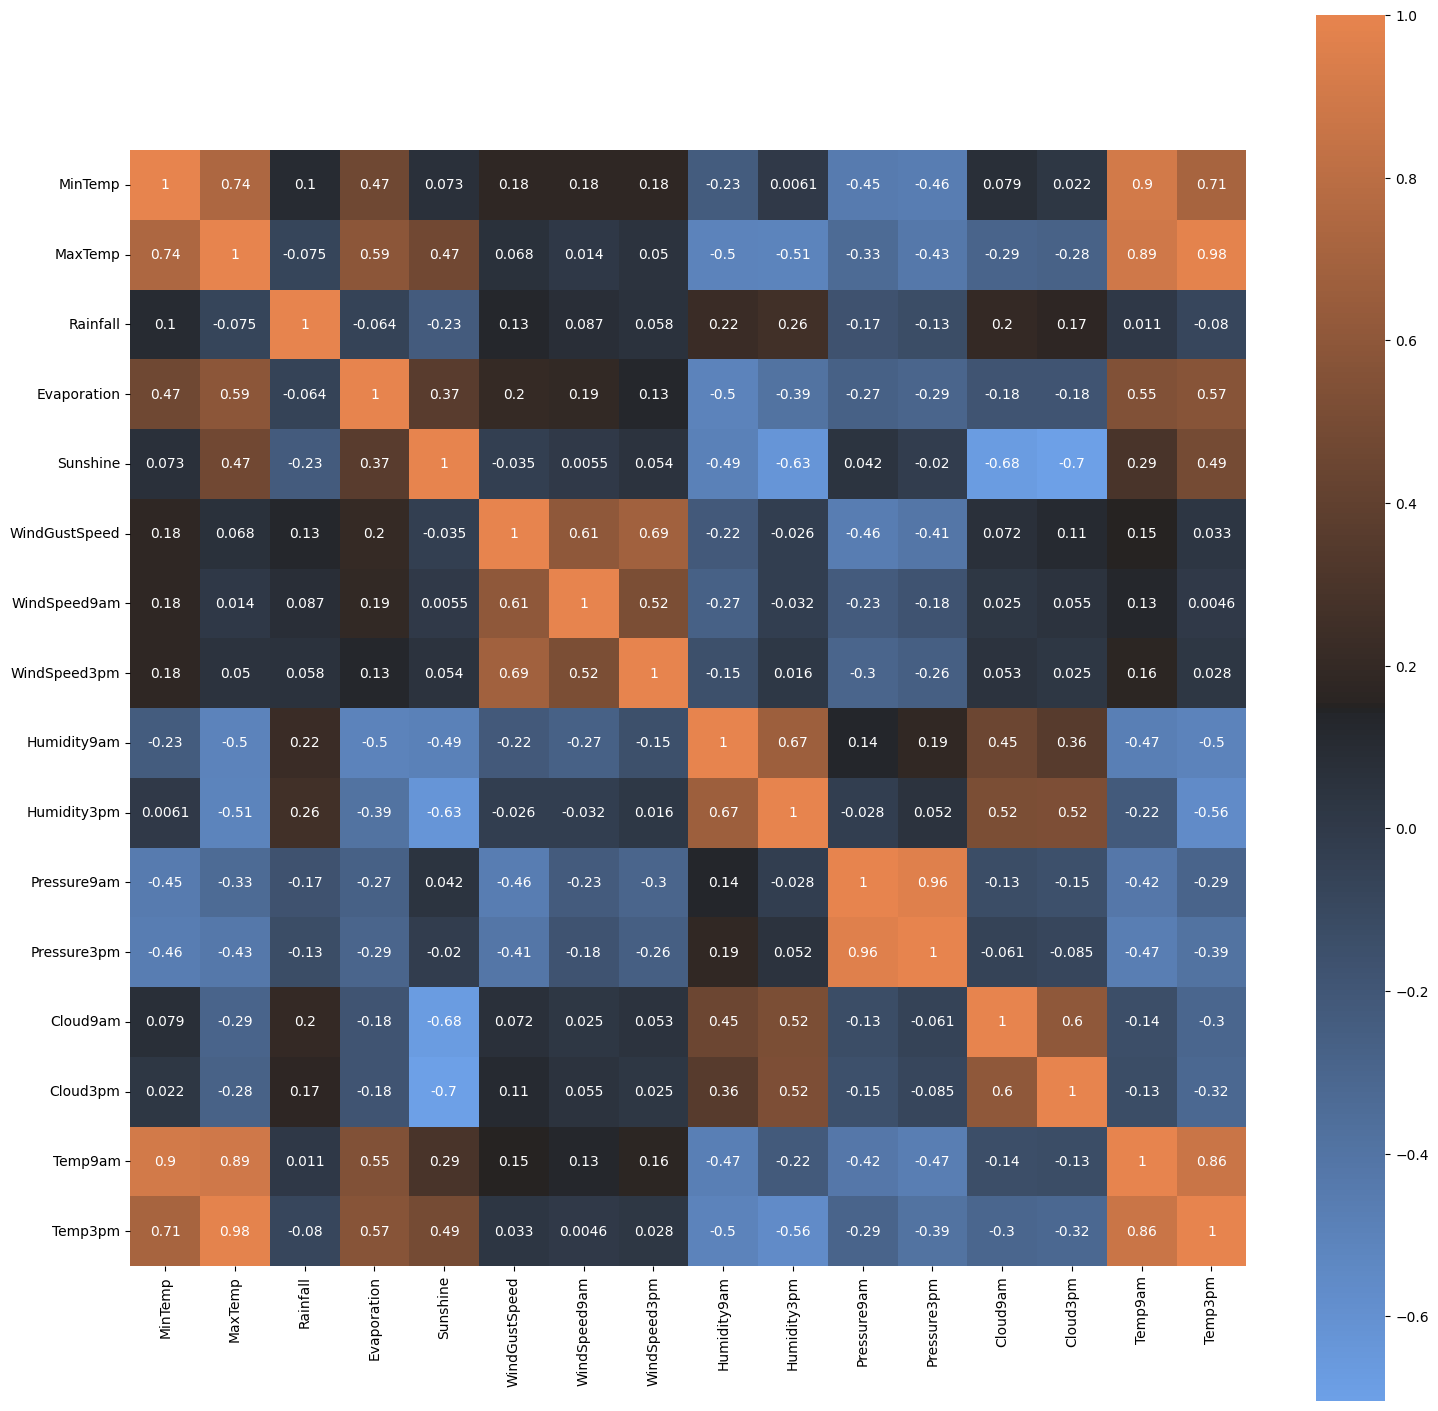

In [53]:
# Correlation among the numeric
# Define the cmap for the rest of our visualization
cmap = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

plt.subplots(figsize = (18, 18))

corr = df.corr(numeric_only = True)
sns.heatmap(corr, cmap = cmap, annot = True, square = True)

**Parse Date variable into datetime**

<br />

To let our Artificial Neural Network (ANN) model know that the Date variable is cyclical, i will split into periodic subsections. Namely, years, months and days. Now for each subsections, i create two new variable deriving a sine transform and cosine transform of the subsection features.

In [54]:
# Parsing Date into datetime
# Exploring the length of the Date objects
lengths = df['Date'].str.len()
lengths.value_counts()

Date
10    145460
Name: count, dtype: int64

In [55]:
df['Date'] = pd.to_datetime(df['Date'])

# Creating a column of year
df['Year'] = df.Date.dt.year

# Build function to encode datetime into cyclic parameters
# I will use the months and days
def encode(ds, col, max_val):
  ds[col + '_sin'] = np.sin(2 * np.pi * ds[col] / max_val)
  ds[col + '_cos'] = np.cos(2 * np.pi * ds[col] / max_val)

  return ds

df['Month'] = df.Date.dt.month
df = encode(df, 'Month', 12)

df['Day'] = df.Date.dt.day
df = encode(df, 'Day', 31)

In [56]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp3pm,RainToday,RainTomorrow,Year,Month,Month_sin,Month_cos,Day,Day_sin,Day_cos
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,21.8,No,No,2008,12,-2.449294e-16,1.0,1,0.201299,0.979530
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,24.3,No,No,2008,12,-2.449294e-16,1.0,2,0.394356,0.918958
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,23.2,No,No,2008,12,-2.449294e-16,1.0,3,0.571268,0.820763
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,26.5,No,No,2008,12,-2.449294e-16,1.0,4,0.724793,0.688967
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,29.7,No,No,2008,12,-2.449294e-16,1.0,5,0.848644,0.528964


Text(0.5, 0, 'Days in year')

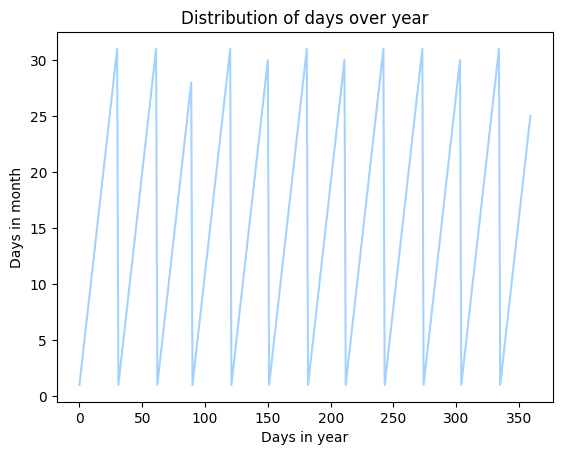

In [57]:
# Roughly a year span section
section = df[:360]
tm = section['Day'].plot(color = '#a2d2ff')
tm.set_title('Distribution of days over year')
tm.set_ylabel('Days in month')
tm.set_xlabel('Days in year')

Text(0.5, 0, 'Sine encoded month')

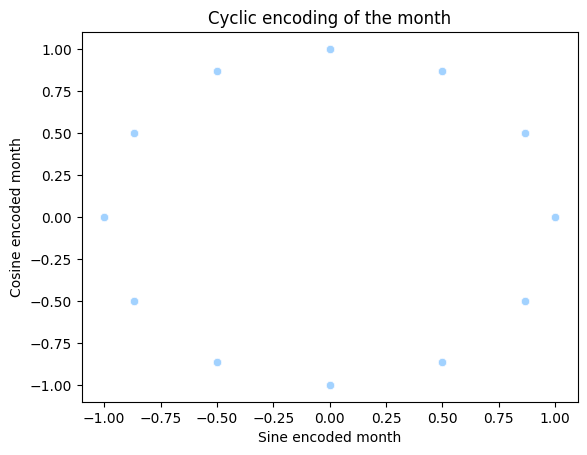

In [58]:
cyclic_month = sns.scatterplot(x = 'Month_sin', y = 'Month_cos', data = df, color = '#a2d2ff')
cyclic_month.set_title('Cyclic encoding of the month')
cyclic_month.set_ylabel('Cosine encoded month')
cyclic_month.set_xlabel('Sine encoded month')

Text(0.5, 0, 'Sine encoded month')

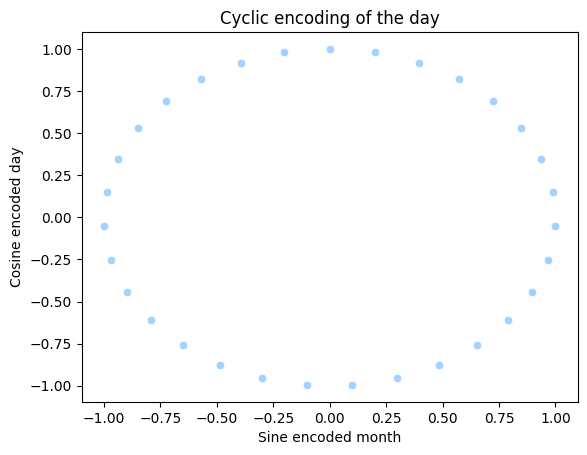

In [59]:
cyclic_day = sns.scatterplot(x = 'Day_sin', y = 'Day_cos', data = df, color = '#a2d2ff')
cyclic_day.set_title('Cyclic encoding of the day')
cyclic_day.set_ylabel('Cosine encoded day')
cyclic_day.set_xlabel('Sine encoded month')

Now i will deal with missing values in numeric and categorical features separately

**Categorical features:**
<br />
* Filling missing values with the mode of the column value

In [60]:
# Get list of categorical variables
obj = (df.dtypes == 'object')
categorical = list(obj[obj].index)

In [61]:
print('Categorical variables: ', categorical)

Categorical variables:  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [62]:
# Missing values in categorical variables
for col in categorical:
  print(col, df[col].isnull().sum())

Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267


In [63]:
# Fill missing values in categorical variables
for col in categorical:
  df[col].fillna(df[col].mode()[0], inplace = True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    145460 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     145460 non-null  object        
 10  WindDir3pm     145460 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

**Numerical values:**
<br />
* Filling missing values with the median of the column values

In [65]:
# Get the list of numerical values
obj = (df.dtypes == 'float64')
numerical = obj[obj].index

In [66]:
print('Numerical variables: ', numerical)

Numerical variables:  Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos'],
      dtype='object')


In [67]:
# Missing values in numerical variables
for col in numerical:
  print(col, df[col].isnull().sum())


MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609
Month_sin 0
Month_cos 0
Day_sin 0
Day_cos 0


In [68]:
# Fill missing values in numerical variables
for col in numerical:
  df[col].fillna(df[col].median(), inplace = True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  object        
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  object        
 10  WindDir3pm     145460 non-null  object        
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

**Steps involved in this section:**
<br />
* Label encoding column with categorical values
* Apply scaling on the numerical features
* Detect and remove outliers based on the analysis

In [70]:
# Apply label encoder on the categorical column
# Import the LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical:
  df[col] = le.fit_transform(df[col])

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  int64         
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  int64         
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  int64         
 10  WindDir3pm     145460 non-null  int64         
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

In [72]:
# Import standard scaler from sklearn
from sklearn.preprocessing import StandardScaler

# Make array of feature only
features = df.drop(columns = ['RainTomorrow', 'Date', 'Day', 'Month'], axis = 1)

# Apply standard scaler on the features
columns = features.columns

scaler = StandardScaler()
features = scaler.fit_transform(features)
features = pd.DataFrame(features, columns = columns)

In [73]:
features

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month_sin,Month_cos,Day_sin,Day_cos
0,-1.531666,0.189757,-0.044575,-0.203581,-0.119472,0.14871,1.045228,0.307739,1.328766,1.366458,...,1.464068,0.137693,-0.013506,0.019135,-0.529795,-1.879575,-0.016425,1.434192,0.278970,1.426023
1,-1.531666,-0.752786,0.265794,-0.275097,-0.119472,0.14871,1.258262,0.307739,-0.221338,1.586813,...,0.149133,0.137693,0.033011,0.384064,-0.529795,-1.879575,-0.016425,1.434192,0.549587,1.339551
2,-1.531666,0.111212,0.350440,-0.275097,-0.119472,0.14871,1.471296,0.460168,1.328766,1.586813,...,0.149133,-1.286294,0.622225,0.223495,-0.529795,-1.879575,-0.016425,1.434192,0.797572,1.199371
3,-1.531666,-0.470023,0.674917,-0.275097,-0.119472,0.14871,-0.872075,-1.216548,0.442992,-1.718521,...,0.149133,0.137693,0.172562,0.705202,-0.529795,-1.879575,-0.016425,1.434192,1.012774,1.011221
4,-1.531666,0.833828,1.281548,-0.155903,-0.119472,0.14871,1.045228,0.079096,-1.328556,-0.176032,...,1.025756,1.561680,0.126045,1.172312,-0.529795,-1.879575,-0.016425,1.434192,1.186382,0.782805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,1.209285,-1.475402,0.025964,-0.275097,-0.119472,0.14871,-1.724209,-0.683048,0.442992,-1.498165,...,0.149133,0.137693,-1.067887,0.106718,-0.529795,1.666978,-0.016425,-1.388032,-1.261688,-0.601030
145456,1.209285,-1.349730,0.294010,-0.275097,-0.119472,0.14871,-0.446007,-1.368977,0.442992,-1.057454,...,0.149133,0.137693,-0.943842,0.413259,-0.529795,1.666978,-0.016425,-1.388032,-1.360192,-0.330159
145457,1.209285,-1.066967,0.519733,-0.275097,-0.119472,0.14871,-1.085108,-0.225761,0.442992,1.366458,...,0.149133,0.137693,-0.695753,0.646814,-0.529795,1.666978,-0.016425,-1.388032,-1.403140,-0.044639
145458,1.209285,-0.689950,0.533840,-0.275097,-0.119472,0.14871,0.193094,-0.911691,0.664436,-1.057454,...,-0.727490,-1.286294,-0.292607,0.632217,-0.529795,1.666978,-0.016425,-1.388032,-1.388775,0.243842


In [74]:
features.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,145460.0,7.815677e-18,1.000003,-1.672228,-0.899139,0.014511,0.857881,1.701250
MinTemp,145460.0,-4.501830e-16,1.000003,-3.250525,-0.705659,-0.030170,0.723865,3.410112
MaxTemp,145460.0,3.001220e-16,1.000003,-3.952405,-0.735852,-0.086898,0.703133,3.510563
Rainfall,145460.0,7.815677e-18,1.000003,-0.275097,-0.275097,-0.275097,-0.203581,43.945571
Evaporation,145460.0,-3.282584e-17,1.000003,-1.629472,-0.371139,-0.119472,0.006361,43.985108
Sunshine,145460.0,-5.424080e-16,1.000003,-2.897217,0.076188,0.148710,0.257494,2.360634
WindGustDir,145460.0,6.252542e-18,1.000003,-1.724209,-0.872075,0.193094,1.045228,1.471296
WindGustSpeed,145460.0,1.824961e-16,1.000003,-2.588407,-0.683048,-0.073333,0.460168,7.243246
WindDir9am,145460.0,7.190423e-17,1.000003,-1.550000,-0.885669,0.000105,0.885879,1.771653
WindDir3pm,145460.0,8.284618e-17,1.000003,-1.718521,-0.837098,0.044324,0.925747,1.586813


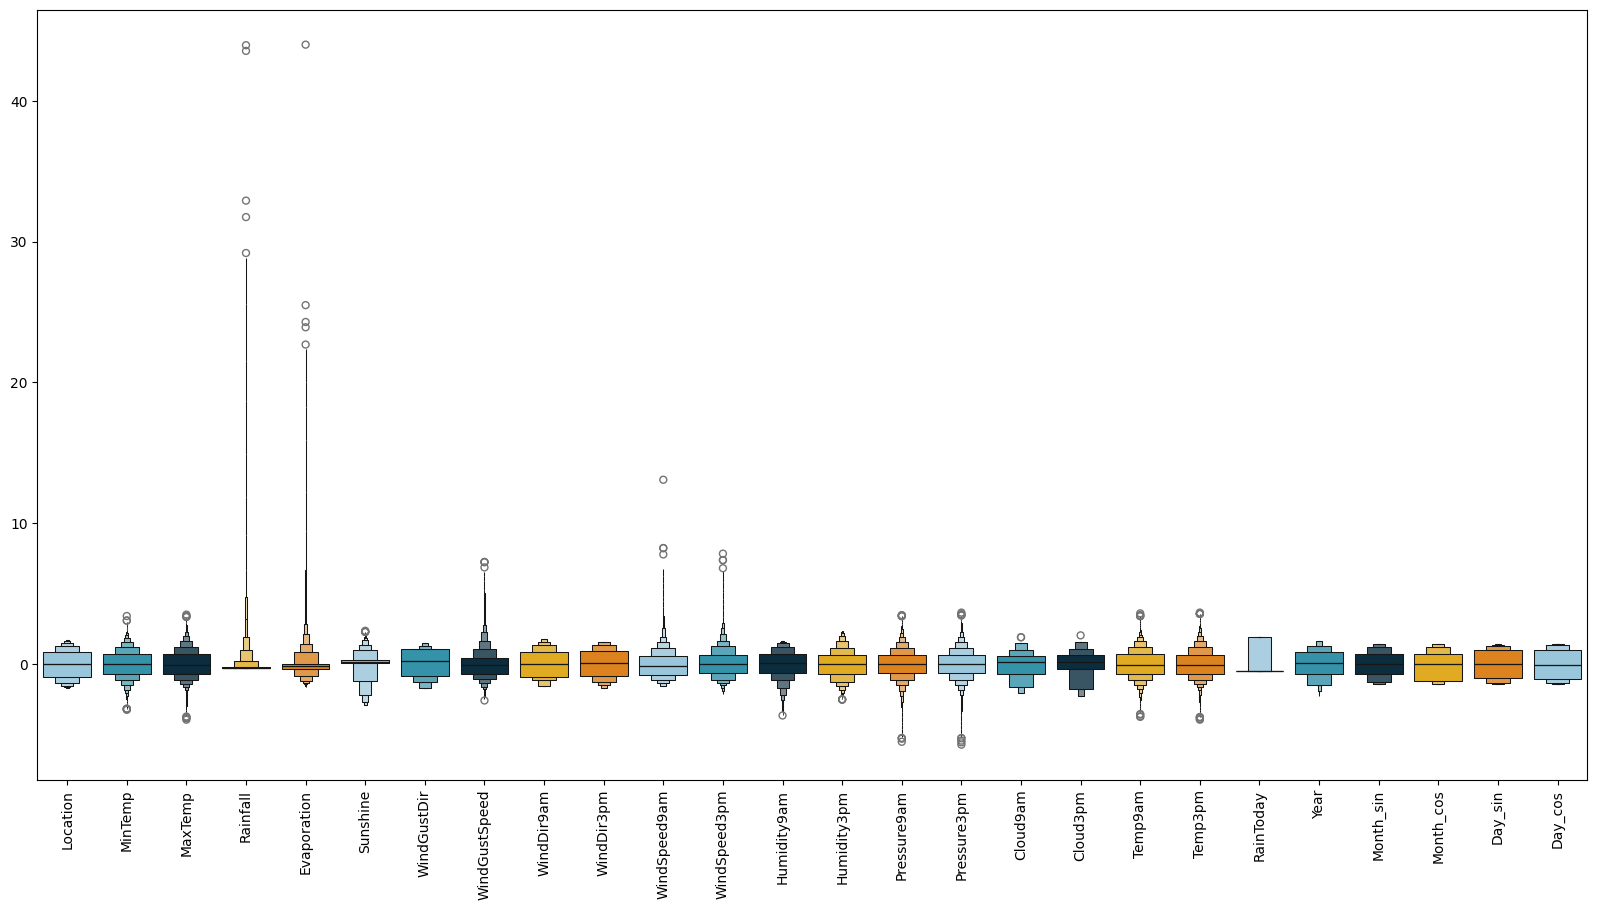

In [75]:
# Detecting outliers
colors = ['#8ecae6', '#219ebc', '#023047', '#ffb703', '#fb8500']

plt.figure(figsize = (20, 10))
sns.boxenplot(data = features, palette = colors)
plt.xticks(rotation = 90)

plt.show()

From the above plot, we can see that outliers occurs on these variables:
* MinTemp
* MaxTemp
* RainFall
* Evaporation
* Sunshine
* WinGustSpeed
* WindSpeed9am
* WindSpeed3pm
* Humidity9am
* Humidity3pm
* Pressure9am
* Pressur3pm
* Cloud9am
* Cloud3pm
* Temp9am
* Temp3am

In [76]:
features = features[(features['MinTemp'] < 2.3) & (features['MinTemp'] > -2.3)]
features = features[(features['MaxTemp'] < 2.3) & (features['MinTemp'] > -2)]
features = features[(features['Rainfall'] < 4.5)]
features = features[(features['Evaporation'] < 2.8)]
features = features[(features['Sunshine'] < 2.1)]
features = features[(features['WindGustSpeed'] < 4) & features['WindGustSpeed'] > -4]
features = features[(features['WindSpeed9am'] < 4)]
features = features[(features['WindSpeed3pm'] < 2.5)]
features = features[(features['Humidity9am'] > -3)]
features = features[(features['Humidity3pm'] > -2.2)]
features = features[(features['Pressure9am'] < 2) & (features['Pressure9am'] > -2.7)]
features = features[(features['Pressure3pm'] < 2) & (features['Pressure3pm'] > -2.7)]
features = features[(features['Cloud9am'] < 1.8)]
features = features[(features['Cloud3pm']) < 2]
features = features[(features['Temp9am'] < 2.3) & (features['Temp9am'] > -2)]
features = features[(features['Temp3pm'] < 2.3) * (features['Temp3pm'] > -2)]

In [77]:
features['RainTomorrow'] = df['RainTomorrow']

In [78]:
features.shape

(127050, 27)

<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Data Preprocessing</p>

**Steps involved in this section:**
<br />
* Splitting between feature and target variable
* Train test split
* Initializing the ANN
* Adding layers
* Compiling the ANN
* Train the ANN

In [79]:
features.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month_sin,Month_cos,Day_sin,Day_cos,RainTomorrow
0,-1.531666,0.189757,-0.044575,-0.203581,-0.119472,0.14871,1.045228,0.307739,1.328766,1.366458,...,0.137693,-0.013506,0.019135,-0.529795,-1.879575,-0.016425,1.434192,0.278970,1.426023,0
1,-1.531666,-0.752786,0.265794,-0.275097,-0.119472,0.14871,1.258262,0.307739,-0.221338,1.586813,...,0.137693,0.033011,0.384064,-0.529795,-1.879575,-0.016425,1.434192,0.549587,1.339551,0
2,-1.531666,0.111212,0.350440,-0.275097,-0.119472,0.14871,1.471296,0.460168,1.328766,1.586813,...,-1.286294,0.622225,0.223495,-0.529795,-1.879575,-0.016425,1.434192,0.797572,1.199371,0
3,-1.531666,-0.470023,0.674917,-0.275097,-0.119472,0.14871,-0.872075,-1.216548,0.442992,-1.718521,...,0.137693,0.172562,0.705202,-0.529795,-1.879575,-0.016425,1.434192,1.012774,1.011221,0
4,-1.531666,0.833828,1.281548,-0.155903,-0.119472,0.14871,1.045228,0.079096,-1.328556,-0.176032,...,1.561680,0.126045,1.172312,-0.529795,-1.879575,-0.016425,1.434192,1.186382,0.782805,0


In [80]:
# Splitting between feature and target variable
X = features.drop(columns = ['RainTomorrow'], axis = 1)
y = features['RainTomorrow']

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [82]:
# Checking the dimension of the input
X_train.shape

(101640, 26)

<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">ANN Modelling And Training</p>

In [84]:
# Import tensorflow and keras
import tensorflow as tf
import keras

# Define the early stopping
early_stopping = keras.callbacks.EarlyStopping(min_delta = 0.001,
                                              patience = 20,
                                              restore_best_weights = True)

# The ANN model
model = tf.keras.models.Sequential()

# Adding layers
model.add(tf.keras.layers.Dense(units = 32, activation = 'relu', input_dim = 26))
model.add(tf.keras.layers.Dense(units = 32, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 16, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(units = 8, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))

# Output layers
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Compiling the ANN
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00009)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks = [early_stopping], validation_split = 0.2)

Epoch 1/150
2541/2541 [==============================] - 10s 3ms/step - loss: 0.4900 - accuracy: 0.7773 - val_loss: 0.4080 - val_accuracy: 0.7828
Epoch 2/150
2541/2541 [==============================] - 7s 3ms/step - loss: 0.4360 - accuracy: 0.7832 - val_loss: 0.3969 - val_accuracy: 0.7828
Epoch 3/150
2541/2541 [==============================] - 8s 3ms/step - loss: 0.4242 - accuracy: 0.7834 - val_loss: 0.3917 - val_accuracy: 0.7828
Epoch 4/150
2541/2541 [==============================] - 6s 3ms/step - loss: 0.4189 - accuracy: 0.7835 - val_loss: 0.3890 - val_accuracy: 0.7828
Epoch 5/150
2541/2541 [==============================] - 8s 3ms/step - loss: 0.4141 - accuracy: 0.7835 - val_loss: 0.3860 - val_accuracy: 0.7828
Epoch 6/150
2541/2541 [==============================] - 9s 3ms/step - loss: 0.4103 - accuracy: 0.7835 - val_loss: 0.3841 - val_accuracy: 0.7828
Epoch 7/150
2541/2541 [==============================] - 8s 3ms/step - loss: 0.4090 - accuracy: 0.7835 - val_loss: 0.3819 - val_a

In [85]:
history.history

{'loss': [0.4900055229663849,
  0.43602102994918823,
  0.42417198419570923,
  0.41886216402053833,
  0.41409704089164734,
  0.4102964401245117,
  0.40901458263397217,
  0.4070160984992981,
  0.4053001403808594,
  0.4036027789115906,
  0.4014796316623688,
  0.4020201861858368,
  0.3983132839202881,
  0.39963462948799133,
  0.39672592282295227,
  0.3976109027862549,
  0.3958125710487366,
  0.39714357256889343,
  0.39493900537490845,
  0.3947639465332031,
  0.3942191004753113,
  0.39400342106819153,
  0.39230722188949585,
  0.39413562417030334,
  0.3927501440048218,
  0.391661137342453,
  0.39148351550102234,
  0.3902575373649597,
  0.39100736379623413,
  0.3900872468948364,
  0.3912244141101837,
  0.39007434248924255,
  0.38912996649742126,
  0.3893129229545593,
  0.38880348205566406,
  0.387780100107193,
  0.3877003490924835,
  0.38822874426841736,
  0.3875458538532257,
  0.3884507119655609,
  0.386274516582489,
  0.38794204592704773,
  0.38578447699546814,
  0.3850831091403961,
  0.386

<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Model Evaluation</p>

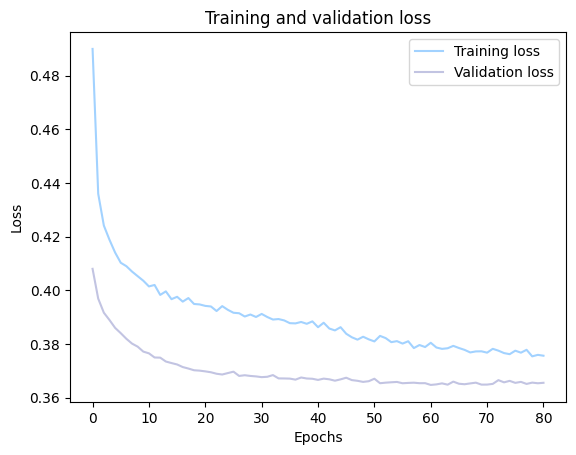

In [88]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], '#a2d2ff', label = 'Training loss')
plt.plot(history_df.loc[:, ['val_loss']], '#C2C4E2', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')

plt.show()

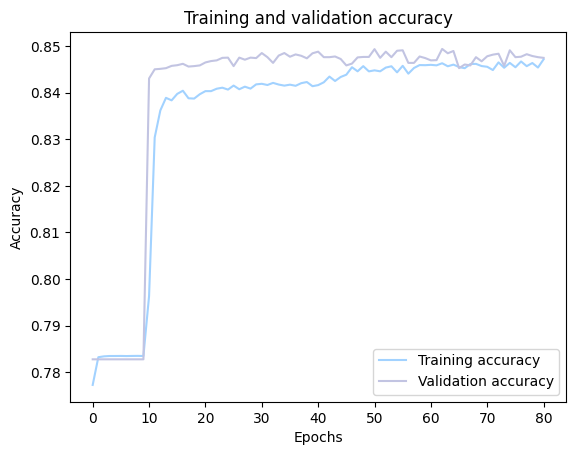

In [90]:
plt.plot(history_df.loc[:, ['accuracy']], '#a2d2ff', label = 'Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], '#C2C4E2', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')

plt.show()

**Steps involved in this section:**
<br />
* Testing on the test set
* Evaluating the confusion matrix
* Evaluating the classification report

In [91]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

795/795 [==============================] - 1s 2ms/step


In [97]:
# Accuracy
# Import from sklearn
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8487209759937032


<Axes: >

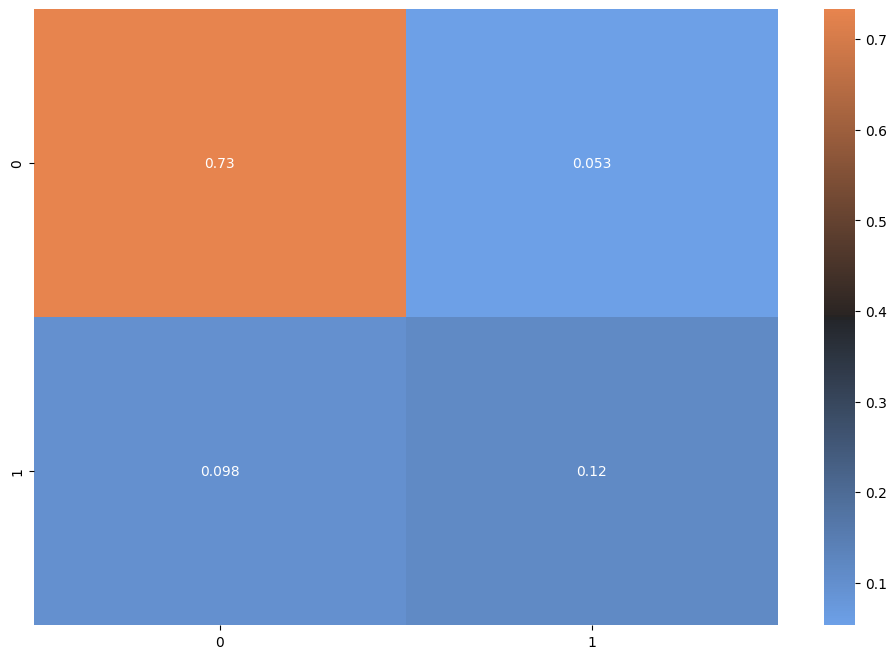

In [94]:
# Confusion matrix
# Import confusion matrix from sklearn
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Make the plot
plt.subplots(figsize = (12, 8))
sns.heatmap(cm/np.sum(cm), cmap = cmap, annot = True)

In [96]:
cm

array([[18623,  1349],
       [ 2495,  2943]])

In [98]:
# Classification report
# Importing from sklearn
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     19972
           1       0.69      0.54      0.60      5438

    accuracy                           0.85     25410
   macro avg       0.78      0.74      0.76     25410
weighted avg       0.84      0.85      0.84     25410

